# Load Libraries/Data

In [137]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks

import holidays
import datetime as dt
from holidays import country_holidays

import glob


import warnings
warnings.filterwarnings('ignore')

In [4]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [5]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
...,...,...,...,...,...,...,...,...,...,...,...
13152058,07/25/2023 12:50:00 AM,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,41.742106,-87.569737
13152174,07/25/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272
13152725,07/25/2023 12:51:00 PM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184


In [14]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


In [15]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Clean Features

In [16]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380


## Convert 'Date' to datetime dtype

In [17]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [21]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145,2001-01-01 13:00:00
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,2001-01-01 13:00:00
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001-01-01 01:00:00
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380,2001-01-01 13:00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 674.2+ MB


## Set 'Datetime' As Index

In [22]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


## Remove Unnecessary Columns

In [24]:
df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN


## Rename 'CRIM SEXUAL ASSAULT' to 'CRIMINAL SEXUAL ASSAULT'

In [333]:
df['Primary Type'].value_counts().index.sort_values()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

In [342]:
df['Primary Type'] = df['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT'})

In [343]:
df['Primary Type'].value_counts().index.sort_values()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

# Task

## **Topic 1) Comparing Police Districts:**
- **Which district has the most crimes?** 
    - *District 8 has the most crime with 527,600 counts*


- **Which has the least?**
    - *District 21 has the least with 4 counts*

In [344]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['OTHER OFFENSE' 'BATTERY' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'CRIMINAL DAMAGE' 'THEFT' 'MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE'
 'OFFENSE INVOLVING CHILDREN' 'WEAPONS VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'SEX OFFENSE' 'NARCOTICS' 'ASSAULT' 'GAMBLING'
 'LIQUOR LAW VIOLATION' 'ROBBERY' 'CRIMINAL TRESPASS'
 'INTERFERENCE WITH PUBLIC OFFICER' 'HOMICIDE' 'KIDNAPPING' 'PROSTITUTION'
 'STALKING' 'INTIMIDATION' 'ARSON' 'RITUALISM' 'DOMESTIC VIOLENCE'
 'OBSCENITY' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


35

### Remove 'NON-CRIMINAL' Primary Types

In [345]:
non_crime = df['Primary Type'].str.startswith('NON')

In [346]:
df1 = df[~non_crime]
df1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year
Datetime,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,2001
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001
...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,2023
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,2023
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,2023


In [347]:
len(df1['Primary Type'].unique())

32

### Get Counts of Districts

In [348]:
plot_1 = df1['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       246
20.0    139064
17.0    226692
24.0    237561
22.0    257347
16.0    263080
14.0    303750
1.0     318337
15.0    336079
10.0    338482
5.0     347801
18.0    352720
19.0    353126
2.0     372209
9.0     383544
12.0    389761
3.0     398380
4.0     446043
25.0    446645
7.0     453427
6.0     459442
11.0    503785
8.0     527600
Name: District, dtype: int64

In [349]:
plot_1.values.sum()

7855125

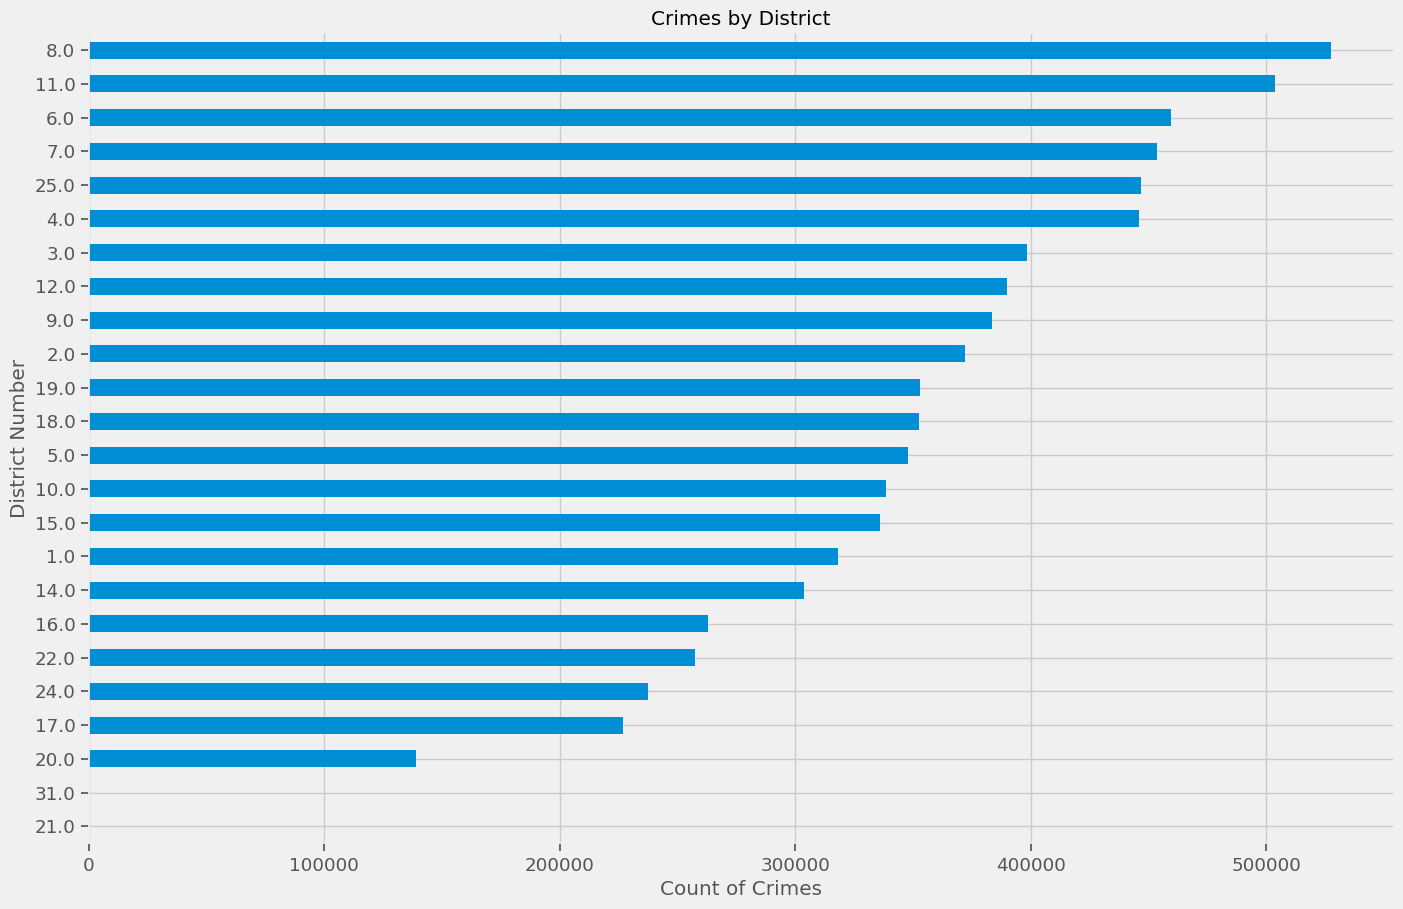

In [350]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

## **Topic 2) Crimes Across the Years:**
- **Is the total number of crimes increasing or decreasing across the years?**
    - *From 2001 to 2023, crime has decreased.*


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**
    - *Seems to be some crimes have trended up, in contrast to the general trend down:*

        - 'CONCEALED CARRY LICENSE VIOLATION'
        - 'DECEPTIVE PRACTICES'
        - 'HOMICIDE'
        - 'HUMAN TRAFFICKING'
        - 'VEHICLE THEFT' (very recently has spiked)
        - 'OBSCENITY'
        - 'STALKING'
        - 'WEAPONS VIOLATION'

### Crimes Increasing or Decreasing Across the Years?

In [351]:
df2 = df[~non_crime]

In [352]:
df2['Year'] = df2.index.year

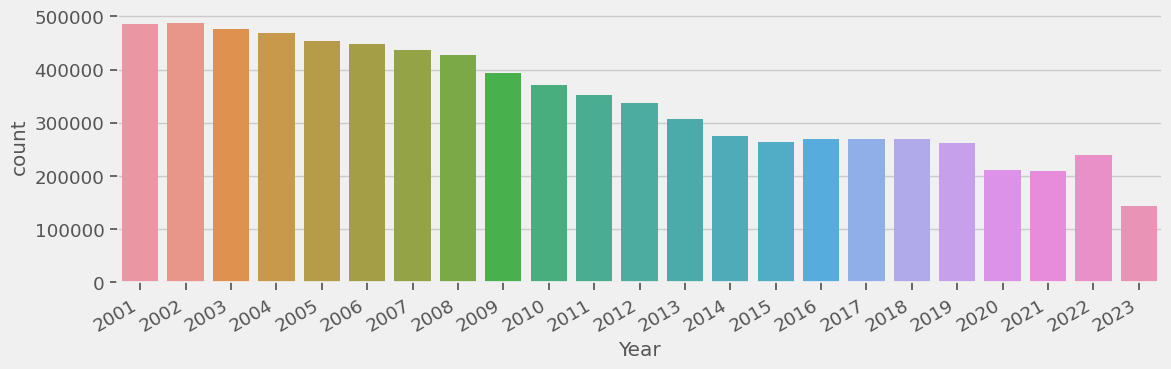

In [353]:
## Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [354]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    142810
2022    238735
2021    208757
2020    212175
2019    261289
2018    268779
2017    269060
2016    269759
2015    264741
2014    275721
2013    307472
2012    336268
2011    351975
2010    370504
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

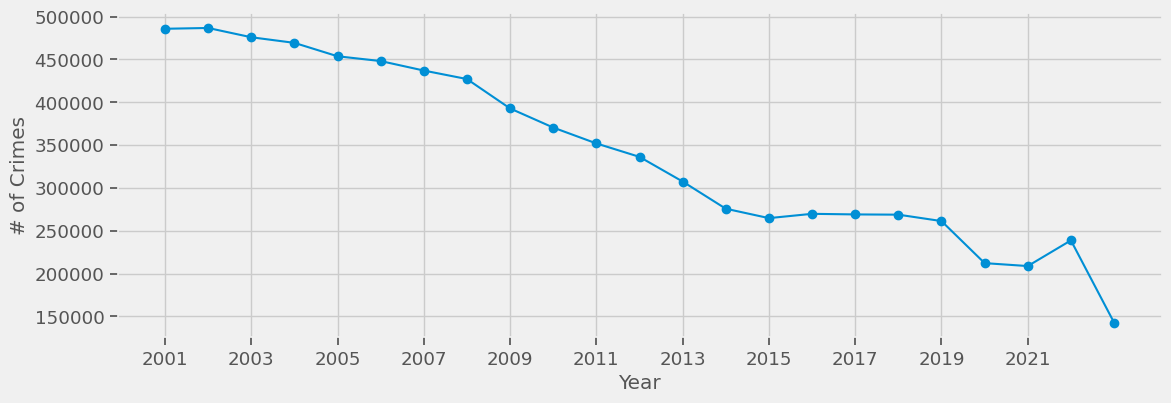

In [355]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Any Crimes Going Against the Overall Trend?

In [356]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year
Datetime,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,2001
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001
...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,2023
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,2023
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,2023


In [357]:
plot_type = df2.groupby('Primary Type').resample('M').size()

In [358]:
plot_type = plot_type.unstack().T
plot_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,3966.0,165.0,1192.0,1398.0,1.0,44.0,42.0,NaN,36.0,18.0,75.0,101.0,2097.0,4714.0,2.0,246.0,1.0,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,3665.0,135.0,1063.0,1163.0,NaN,37.0,27.0,NaN,27.0,24.0,57.0,109.0,1785.0,4369.0,1.0,152.0,0.0,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,4617.0,153.0,1141.0,1313.0,NaN,55.0,37.0,NaN,22.0,22.0,72.0,147.0,2151.0,4862.0,2.0,195.0,0.0,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,4922.0,134.0,1133.0,1199.0,NaN,79.0,59.0,NaN,34.0,21.0,49.0,164.0,2120.0,4044.0,2.0,196.0,0.0,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,4757.0,157.0,1067.0,1261.0,NaN,94.0,42.0,NaN,41.0,25.0,56.0,194.0,2197.0,4038.0,1.0,213.0,2.0,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,29.0,1755.0,3405.0,569.0,17.0,2320.0,111.0,440.0,1478.0,NaN,1.0,37.0,2.0,61.0,30.0,6.0,24.0,2320.0,398.0,4.0,152.0,NaN,1395.0,7.0,0.0,66.0,NaN,685.0,102.0,38.0,4445.0,631.0
2023-04-30,36.0,1807.0,3599.0,594.0,12.0,2430.0,121.0,363.0,1399.0,NaN,0.0,55.0,0.0,51.0,20.0,5.0,10.0,2282.0,322.0,2.0,161.0,NaN,1221.0,5.0,0.0,82.0,NaN,752.0,113.0,38.0,4329.0,688.0
2023-05-31,54.0,2013.0,3947.0,611.0,9.0,2579.0,147.0,389.0,1281.0,NaN,0.0,64.0,0.0,45.0,22.0,22.0,19.0,2426.0,332.0,4.0,169.0,NaN,1223.0,5.0,2.0,81.0,NaN,771.0,126.0,40.0,4683.0,821.0


In [359]:
plot_type = plot_type.fillna(0.0)
plot_type.isna().sum().sum()

0

#### Yearly Trend Visualization per Crime

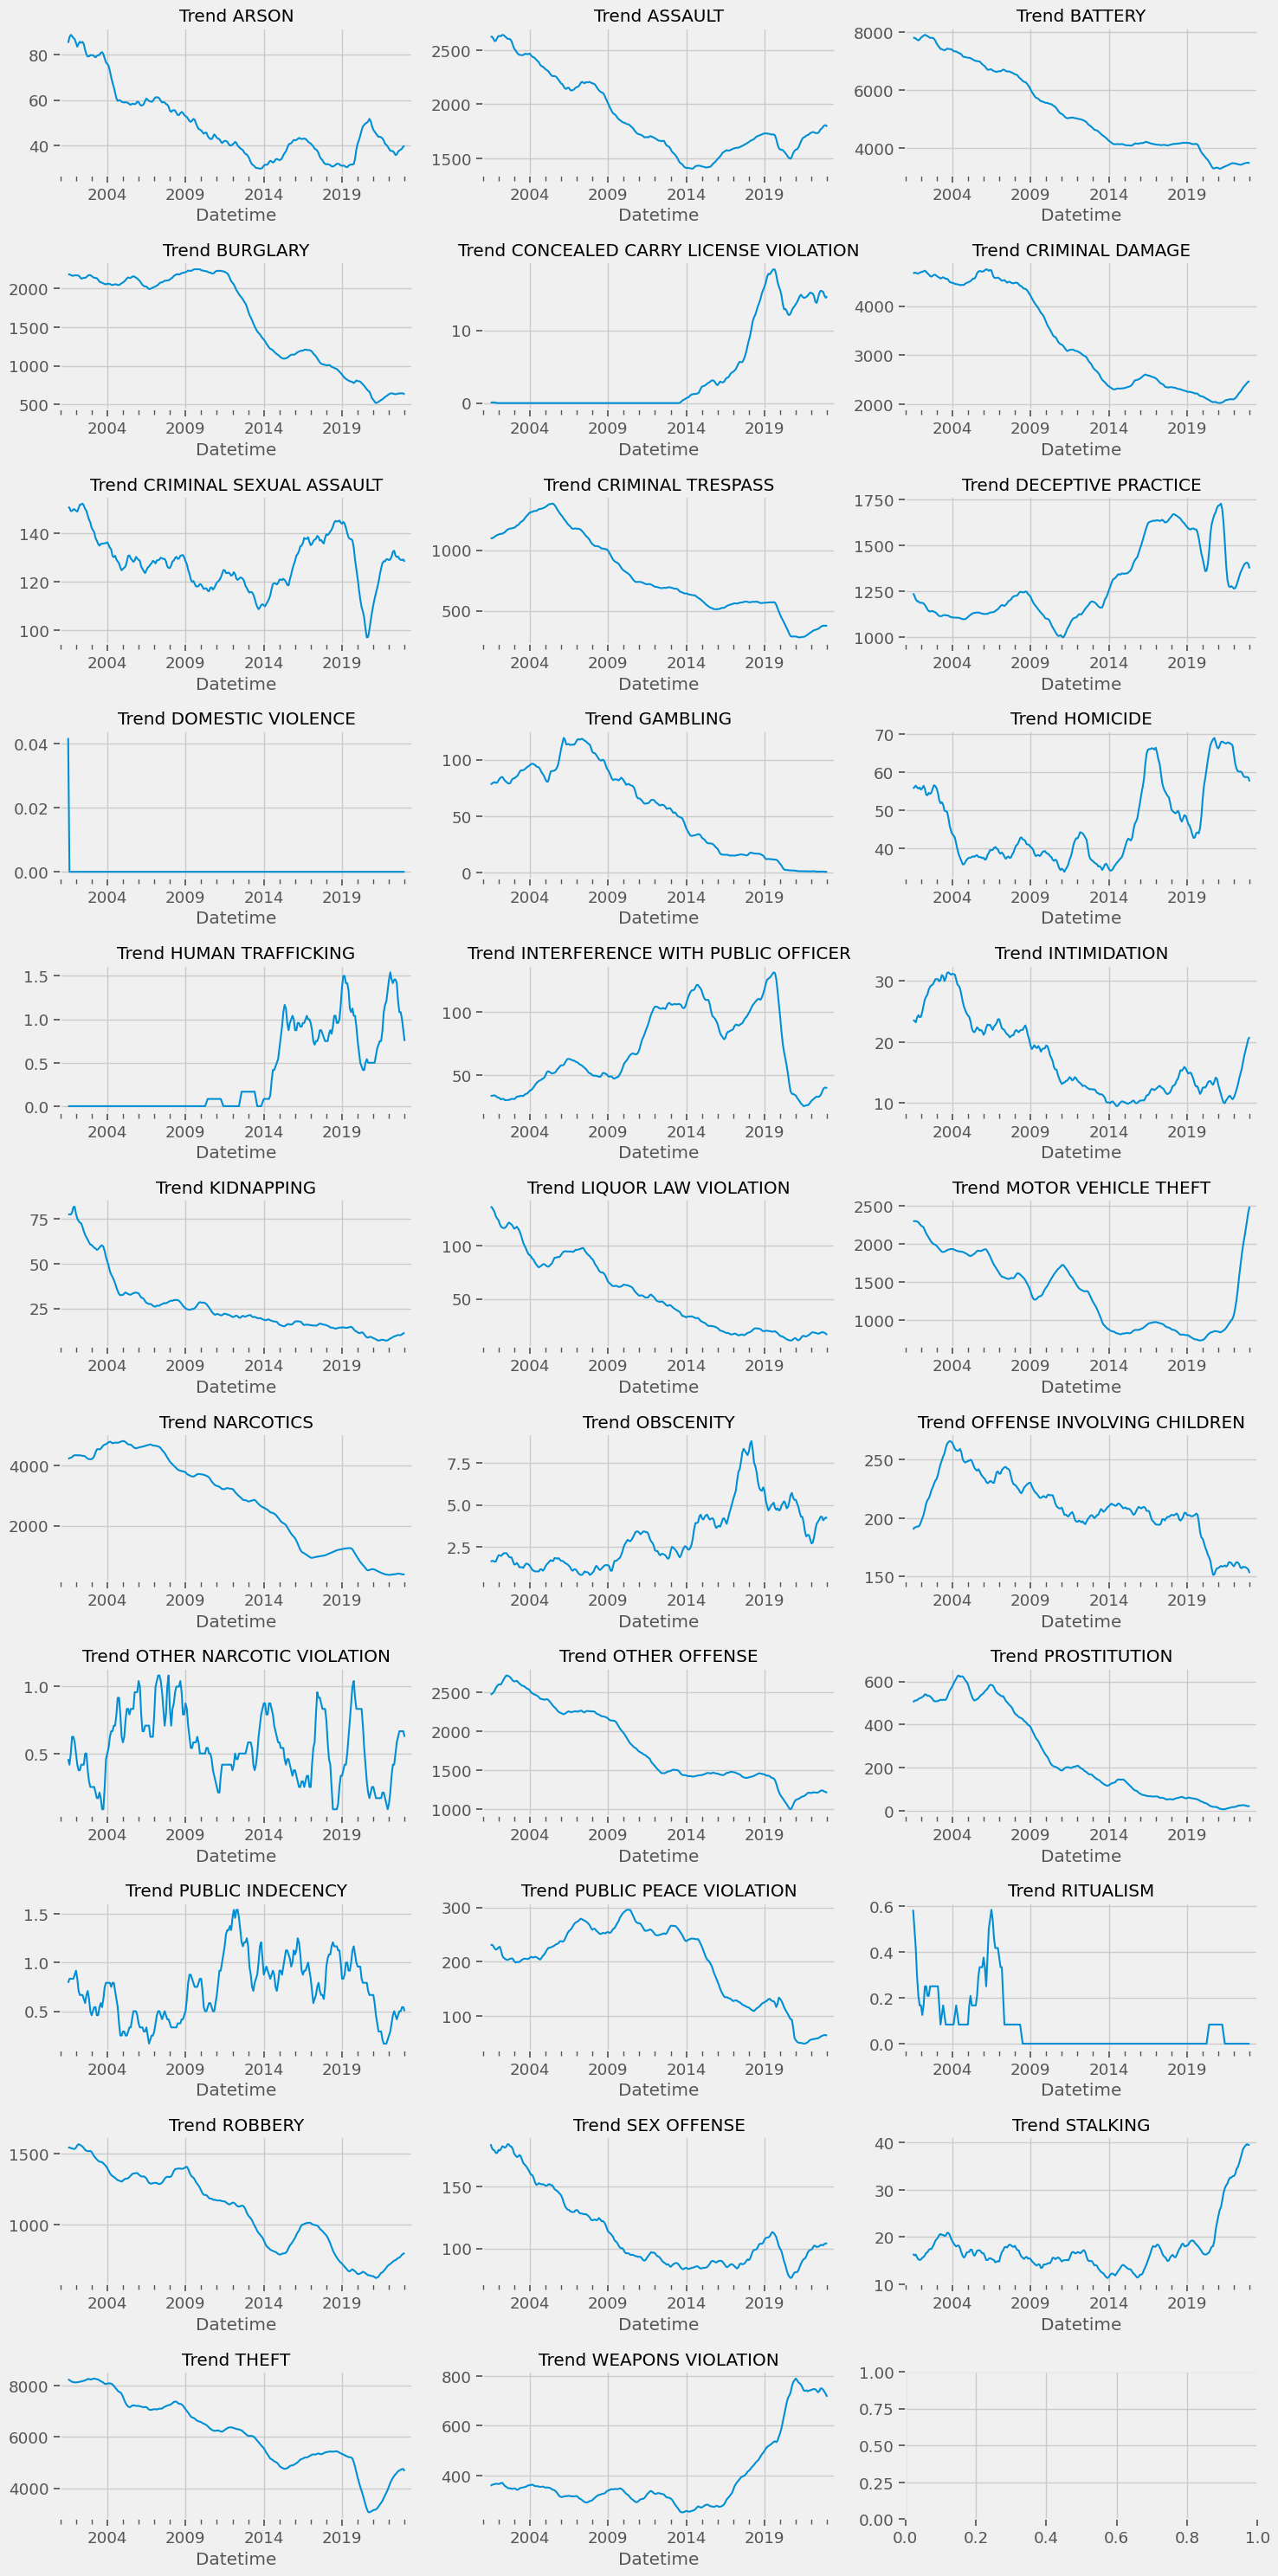

In [367]:
fig, axes = plt.subplots(11, 3, figsize=(15,30))

for indx, crime in enumerate(plot_type.columns):
    row = indx // 3
    col = indx % 3
    ts = plot_type[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout()

## **Topic 4) Comparing Months:**

- **What months have the most crime? What months have the least?**
    - *The most crime seems to occur during the Summer months (May to August)*
    - *The least crime occurs during the Winter months (November to February)*


- **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

- *Some Crimes do seem to buck the overall trend (does not create a distinct "hump" during the Summer Months)*
    - 'DECEPTIVE PRACTICE'
    - 'NARCOTICS' (has more of a continuous downward trend)
    - 'OBSCENITY'
    - 'OFFENSE INVOLVING CHILDREN'
    - 'RITUALISM' (drops substantially April to July and spikes in August)

In [361]:
df4 = df[~non_crime]

In [362]:
df4['Month'] = df4.index.month
df4['MonthName'] = df4.index.month_name()
df4.head(3)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Month,MonthName
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001,1,January
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001,1,January
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001,1,January


In [363]:
# saving lookup for number vs name
unique_months = df4.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

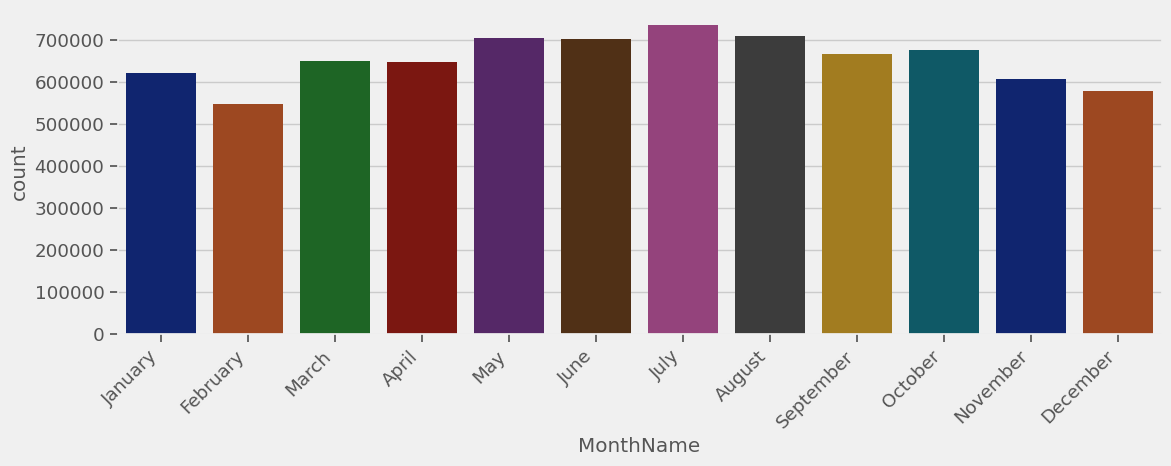

In [364]:
ax = sns.countplot(data=df4, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Visualization Count of Crimes per Month

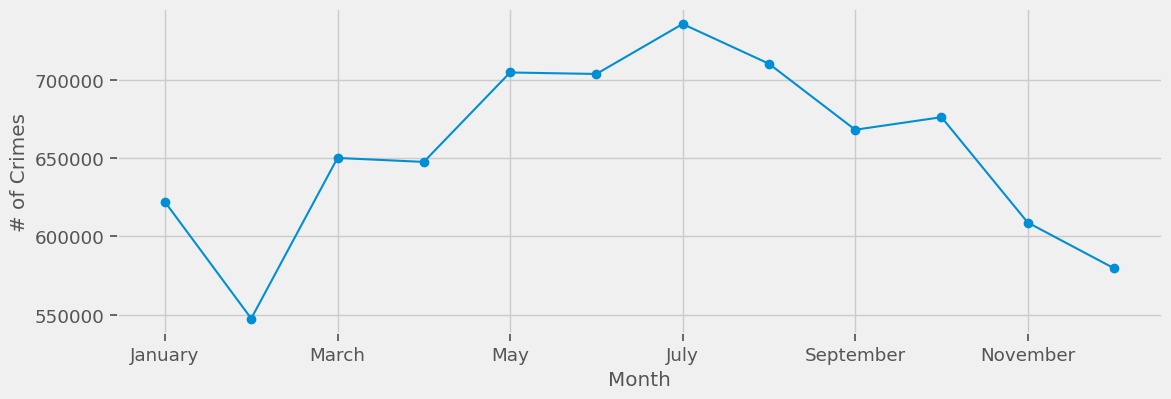

In [366]:
## save month counts
# month_lookup.values() will reorder df['MonthName'].value_counts() by month
month_counts = df4['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Any Crimes Going Against Monthly Trend?

In [373]:
df4

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Month,MonthName
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001,1,January
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001,1,January
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001,1,January
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,2001,1,January
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001,1,January
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,2023,7,July
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,2023,7,July
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,2023,7,July


In [403]:
plot_type4.index

MultiIndex([(            'ARSON', '2001-01-31'),
            (            'ARSON', '2001-02-28'),
            (            'ARSON', '2001-03-31'),
            (            'ARSON', '2001-04-30'),
            (            'ARSON', '2001-05-31'),
            (            'ARSON', '2001-06-30'),
            (            'ARSON', '2001-07-31'),
            (            'ARSON', '2001-08-31'),
            (            'ARSON', '2001-09-30'),
            (            'ARSON', '2001-10-31'),
            ...
            ('WEAPONS VIOLATION', '2022-10-31'),
            ('WEAPONS VIOLATION', '2022-11-30'),
            ('WEAPONS VIOLATION', '2022-12-31'),
            ('WEAPONS VIOLATION', '2023-01-31'),
            ('WEAPONS VIOLATION', '2023-02-28'),
            ('WEAPONS VIOLATION', '2023-03-31'),
            ('WEAPONS VIOLATION', '2023-04-30'),
            ('WEAPONS VIOLATION', '2023-05-31'),
            ('WEAPONS VIOLATION', '2023-06-30'),
            ('WEAPONS VIOLATION', '2023-07-31')],
   

In [424]:
plot_type4 = df4.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type4

Primary Type       Month  MonthName
ARSON              1      January       963
                   2      February      840
                   3      March        1140
                   4      April        1134
                   5      May          1284
                                       ... 
WEAPONS VIOLATION  8      August       9887
                   9      September    9435
                   10     October      9190
                   11     November     7952
                   12     December     7401
Length: 372, dtype: int64

In [425]:
plot_type4_df = plot_type4.to_frame('# of Crimes').reset_index()
plot_type4_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,840
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
367,WEAPONS VIOLATION,8,August,9887
368,WEAPONS VIOLATION,9,September,9435
369,WEAPONS VIOLATION,10,October,9190
370,WEAPONS VIOLATION,11,November,7952


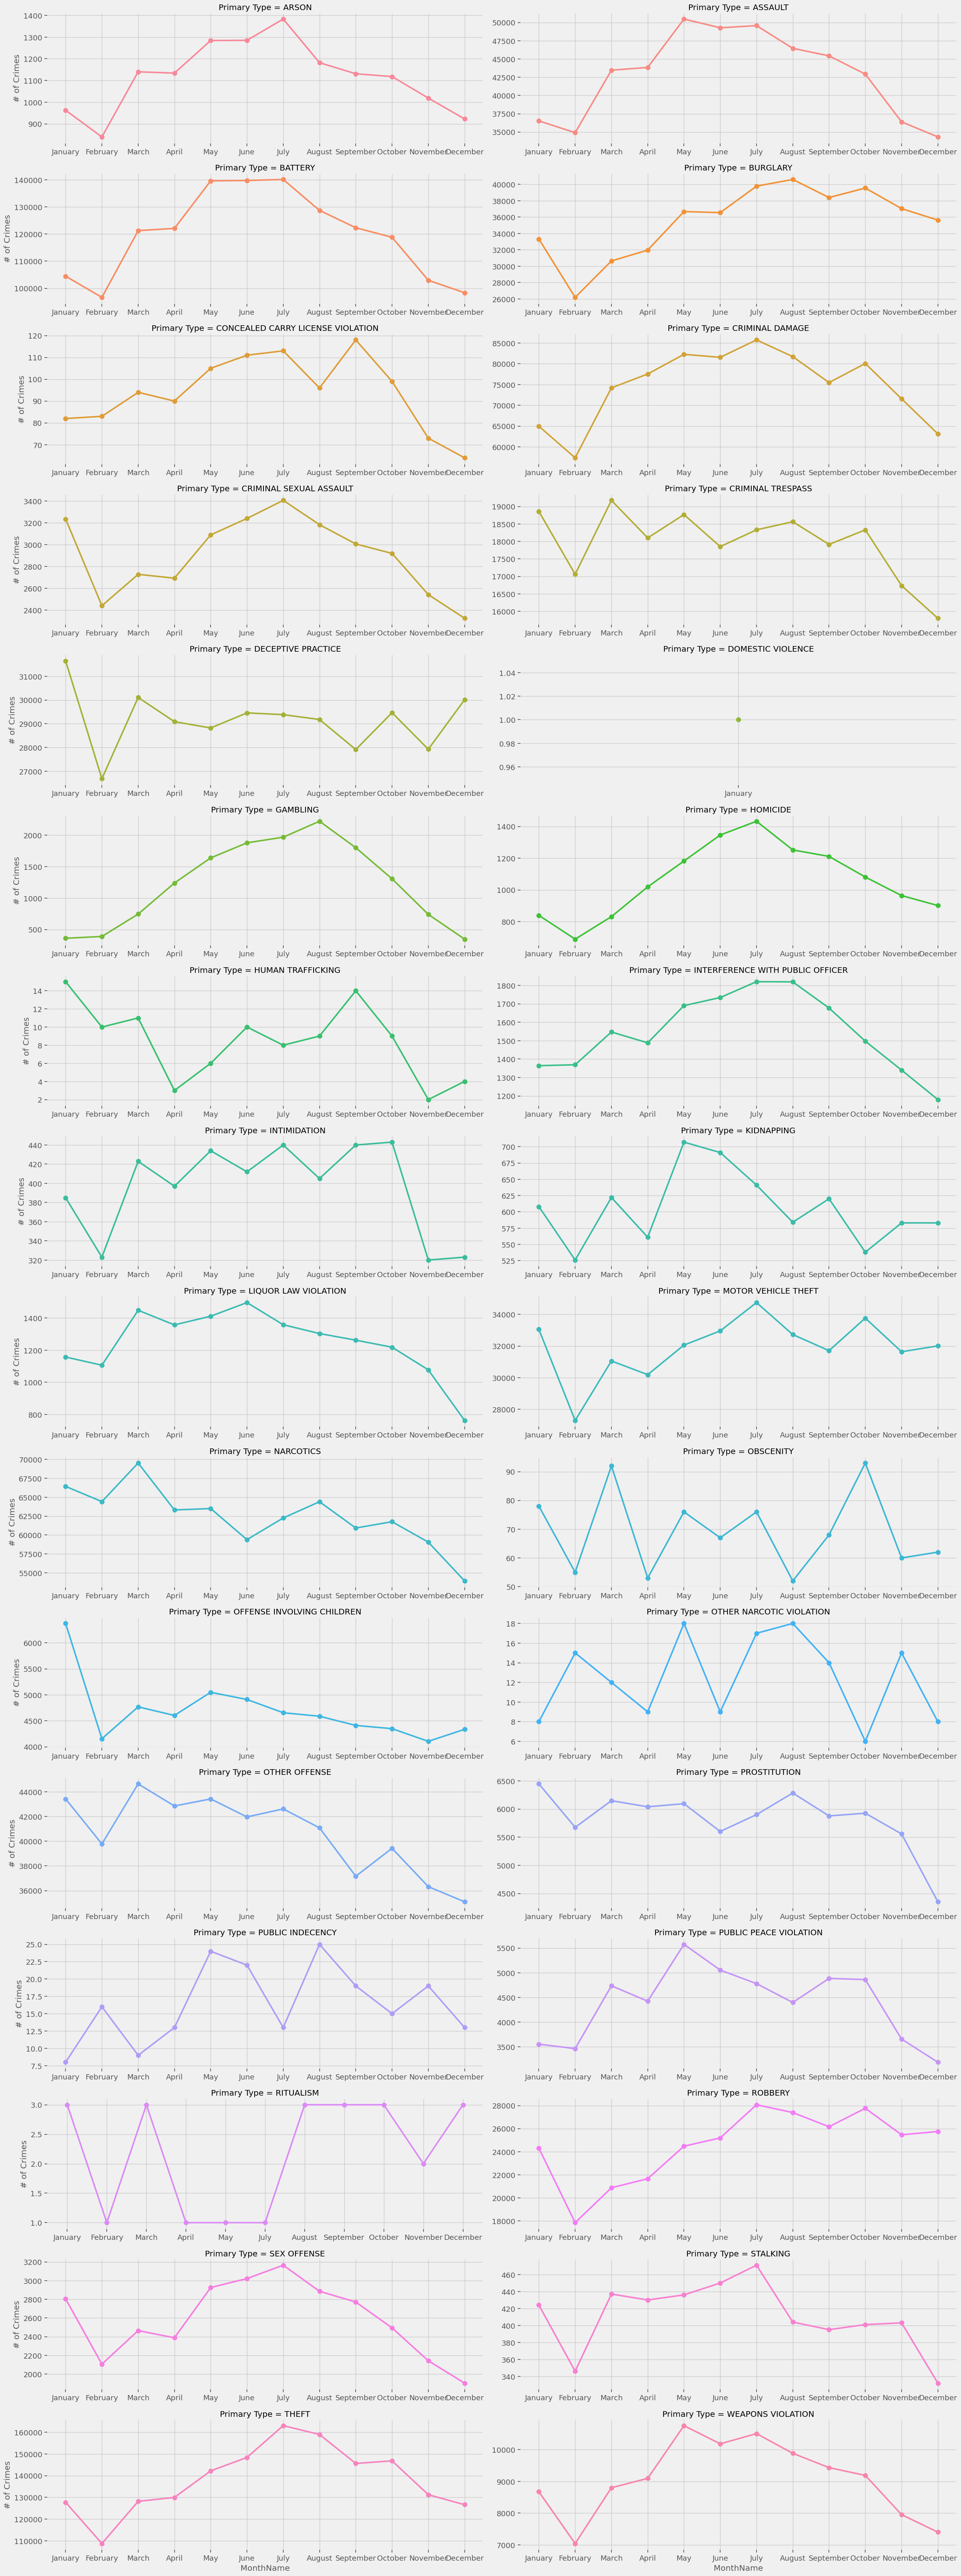

In [432]:
g = sns.catplot(data=plot_type4_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];